# 코린이들, 해커톤
---
[관련링크](https://bit,ly/sesac-aithon)

# 문제
* 퇴사자 발생을 줄이기
* 퇴사자 1명 발생 -> 채용 + 교육 + 생산성 저하 등 비용 발생 -> 비즈니스 악영향

## Q.
당신은 대기업 A사의 채용팀으로, 직업을 채용하고 회사에 잘 적응하도록 교육하는 일을 맡고 있다. 하지만, 최근 퇴사가 증가해, 대신할 직원들을 다시 뽑고 교육하는 데 많은 비용이 발생.  
이를 해결하기 위해서 직원의 퇴사 여부를 예측하여 조취하고  
### "퇴사 여부를 예측하는 이진분류 모델을 만드세요."
---

### [공통사항]
* 데이터는 회사의 직원관리를 위한 인사데이터로 총 1470 index로 구성
* 예측하야 할 변수 (Target)는 퇴사 여부 (Yes/No)이며 알맞은 데이터 변환이 필요
* Train/test 비율은 &:3, Random_state = 1로 설정
* parameter 설정 및 사용자가 원하는데로 사용
* 의사결정나무를 사용할 예정!

### 문제 풀이 순서
* 목적에 맞는 모델 선택
    * 퇴사자 분류 -> 분류 모델
* 데이터를 준비하고 미리 가공
    * (결측치확인, 데이터 타입 변경)
* 학습
* 모델 평가
    * 오차확인(정확도 평가)
* 모델간 비교 / 파라미터 튜닝
    * 다른 모델로 변경
    * 내부 학습 알고리즘을 바꾼다.

### 문제 풀이 1. 의사결정나무 

#### 모듈 설치 및 초기 설정

In [ ]:
# pakage install 및 update
!pip install pandas
!pip install matplotlib
!pip install scikit-learn 

In [11]:
# import
import pandas as pd # pandas 사용 for 데이터 처리
import matplotlib.pyplot as plt ; import matplotlib # 데이터 시각화를 위한 matplotlib 사용
from sklearn.tree import plot_tree # 나무 구조 시각화를 위해서
from sklearn.model_selection import train_test_split # 데이터 Train가 test로 나누기 위해서 사용
from sklearn.tree import DecisionTreeClassifier  # 의사결정나무
from sklearn.model_selection import GridSearchCV # 최적 모델, parameter 탐색을 위해서 사용
# 모델 성능 평가를 위해서 사용
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report

In [12]:
# 한글 폰트 설정
matplotlib.rc("font", family = "Malgun Gothic")
# 음수 표시 설정
matplotlib.rc('axes', unicode_minus = False)

#### 데이터 불러오기

In [101]:
# dataset
df1 = pd.read_csv('hr_preprocessed_1470_24.csv', index_col = 0) # data 확인
df1

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,Gender,HourlyRate,JobInvolvement,JobRole,...,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsWithCurrManager,Low_Satisfaction
0,41,Yes,Travel_Rarely,1102,1,2,Female,94,3,Sales Executive,...,Yes,3,1,0,8,0,1,6,5,0.0
1,49,No,Travel_Frequently,279,8,1,Male,61,2,Research Scientist,...,No,4,4,1,10,3,3,10,7,0.0
2,37,Yes,Travel_Rarely,1373,2,2,Male,92,2,Laboratory Technician,...,Yes,3,2,0,7,3,3,0,0,0.0
3,33,No,Travel_Frequently,1392,3,4,Female,56,3,Research Scientist,...,Yes,3,3,0,8,3,3,8,0,0.0
4,27,No,Travel_Rarely,591,2,1,Male,40,3,Laboratory Technician,...,No,3,4,1,6,3,3,2,2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,23,2,Male,41,4,Laboratory Technician,...,No,3,3,1,17,3,3,5,3,0.0
1466,39,No,Travel_Rarely,613,6,1,Male,42,2,Healthcare Representative,...,No,3,1,1,9,5,3,7,7,0.0
1467,27,No,Travel_Rarely,155,4,3,Male,87,4,Manufacturing Director,...,Yes,4,2,1,6,0,3,6,3,0.0
1468,49,No,Travel_Frequently,1023,2,3,Male,63,2,Sales Executive,...,No,3,4,0,17,3,2,9,8,0.0


In [102]:
df1.info() # 불러온 데이터에 대해서 전반적으로 확인

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 1469
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   Attrition                 1470 non-null   object 
 2   BusinessTravel            1470 non-null   object 
 3   DailyRate                 1470 non-null   int64  
 4   DistanceFromHome          1470 non-null   int64  
 5   Education                 1470 non-null   int64  
 6   Gender                    1470 non-null   object 
 7   HourlyRate                1470 non-null   int64  
 8   JobInvolvement            1470 non-null   int64  
 9   JobRole                   1470 non-null   object 
 10  JobSatisfaction           1470 non-null   int64  
 11  MaritalStatus             1470 non-null   object 
 12  MonthlyIncome             1470 non-null   int64  
 13  NumCompaniesWorked        1470 non-null   int64  
 14  OverTime

In [103]:
# 위에서 int형 data들이 가지고 있는 기초 통계량 확인
df1.describe()

,Age,DailyRate,DistanceFromHome,Education,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsWithCurrManager,Low_Satisfaction
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,65.891156,2.729932,2.728571,6502.931293,2.693197,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.123129,0.193197
std,9.135373,403.509100,8.106864,1.024165,20.329428,0.711561,1.102846,4707.956783,2.498009,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.568136,0.394941
min,18.000000,102.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1009.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,48.000000,2.000000,2.000000,2911.000000,1.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000
50%,36.000000,802.000000,7.000000,3.000000,66.000000,3.000000,3.000000,4919.000000,2.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,0.000000
75%,43.000000,1157.000000,14.000000,4.000000,83.750000,3.000000,4.000000,8379.000000,4.000000,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,0.000000
max,60.000000,1499.000000,29.000000,5.000000,100.000000,4.000000,4.000000,19999.000000,9.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,17.000000,1.000000


In [104]:
# 빈 데이터 (결측치 확인)
df1.isnull().sum(axis = 0) # 행에 대해서 싫애

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
DistanceFromHome            0
Education                   0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked          0
OverTime                    0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsWithCurrManager        0
Low_Satisfaction            0
dtype: int64

#### target 변수/feature 변수 preprocessing 
* 데이터 가공

In [112]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
catColumns = df1.select_dtypes(['object']).columns # 문자형 데이터를 가지고 있는 columns 
for col in catColumns:
    n = len(df1[col].unique()) # 매개변수들의 대답의 개수 확인
    if (n > 2): # 매개변수의 대답이 2개 이상이 되면 실행
        X = pd.get_dummies(df1[col]) # 
        X = X.drop(X.columns[0], axis=1)
        df1[X.columns] = X
        df1.drop(col, axis=1, inplace=True)  # drop the original categorical variable (optional)
    else:
        label_encoder.fit(df1[col]) # 2개인 데이터는 0과 1로 나눠서 사용하겠다.
        df1[col] = label_encoder.transform(df1[col]) # 

In [113]:
catColumns

Index([], dtype='object')

In [114]:
df1.info() # dtype = 'object' 인것을 사용 X -> 위에서 처리함.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 1469
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   Attrition                 1470 non-null   int32  
 2   DailyRate                 1470 non-null   int64  
 3   DistanceFromHome          1470 non-null   int64  
 4   Education                 1470 non-null   int64  
 5   Gender                    1470 non-null   int32  
 6   HourlyRate                1470 non-null   int64  
 7   JobInvolvement            1470 non-null   int64  
 8   JobSatisfaction           1470 non-null   int64  
 9   MonthlyIncome             1470 non-null   int64  
 10  NumCompaniesWorked        1470 non-null   int64  
 11  OverTime                  1470 non-null   int32  
 12  PerformanceRating         1470 non-null   int64  
 13  RelationshipSatisfaction  1470 non-null   int64  
 14  StockOpt

#### Train/Test Split
* data 자료 분리

In [117]:
# Attrition 
features = df1.drop('Attrition', axis = 1)
labels = df1['Attrition']
#features # X 값
labels

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int32

In [119]:
# train과 test 데이터 간 데이터를 분류 총 1470개에서 test가 30%정도로 설정. rad
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.3, random_state = 1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1029, 32)
(441, 32)
(1029,)
(441,)


721     0
843     0
627     0
1368    0
305     0
Name: Attrition, dtype: int32

#### Model Creation/fit

In [178]:
# 임의의 parameter
# point1: 파라미터를 바꾸어가면서 성능 변화 관찰이 필요
# 
model_dt = DecisionTreeClassifier(criterion = 'entropy', 
                                 max_depth = 9,
                                 min_samples_leaf = 4,
                                 min_samples_split = 2 # 최소 = 2
                                 )
#12 min_samples 높이면 더 높은 위치에 멈춘다. 마지막 위치에 대한 양르 말함.

In [179]:
model_dt.fit(X_train, y_train) # 생성한 모델 확인

DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=4)

In [180]:
# 데이터 정확도
print("학습용 데이터의 정확도 : {:.3f}".format(model_dt.score(X_train, y_train)))
print("평가용 데이터의 정확도 : {:.3f}".format(model_dt.score(X_test, y_test)))

학습용 데이터의 정확도 : 0.935
평가용 데이터의 정확도 : 0.814


#### 모델 파라미터 조정 - manual search
* max_depth : 최대 깊이 변경에 따른 모델 성능

In [138]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# max_depth: 최대 깊이 변경
para_depth = [depth for depth in range(1, 11)]
for v_max_depth in para_depth:
    tree = DecisionTreeClassifier(max_depth = v_max_depth, random_state=1234)
    tree.fit(X_train, y_train)
    train_accuracy.append(tree.score(X_train, y_train))
    test_accuracy.append(tree.score(X_test,y_test))
# 데이터 테이블로 저장
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy

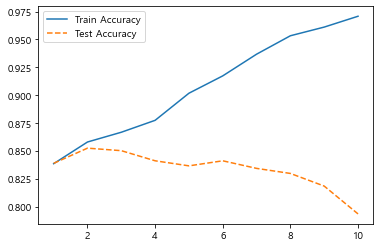

In [182]:
# 모델 정확도 확인
df_accuracy_depth.round(3)
# 모델 정확도 그래프 확인
plt.plot(para_depth, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

#### GridSearchCV를 활용한 파라미터 

In [183]:
estimator = DecisionTreeClassifier()

# 구하고자 하는 parameter와 범위
param_list = {"max_depth": para_depth, "min_samples_split": [2,3,4,5,6,7],
"min_samples_leaf": [2,3,4,5,6,7]}

    # 위의 manual search 에서 para_depth의 범위 지정해주었기 때문에 그대로 변수로 넣을 수 있음
    # 나머지 parameter들은 임의로 범위를 지정하고 다양한 버전의 gridsearch 돌려볼 수 있음

# 정확도가 높은 최적 parameter 찾기
grid_dt = GridSearchCV(estimator, param_list, scoring="accuracy", n_jobs = -1)
grid_dt.fit(X_train, y_train)
print("best estimator model: \n{}".format(grid_dt.best_estimator_))
print("\nbest parameter: \n{}".format(grid_dt.best_params_))
print("\nbest score: \n{}".format(grid_dt.best_score_.round(3)))

best estimator model: 
DecisionTreeClassifier(max_depth=4, min_samples_leaf=2)

best parameter: 
{'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2}

best score: 
0.847


#### Socre (Accuracy)
* 정확도 측정

In [184]:
# 데이터 정확도
print("학습용 데이터의 정확도 : {:.3f}".format(model_dt.score(X_train, y_train)))
print("평가용 데이터의 정확도 : {:.3f}".format(model_dt.score(X_test, y_test)))

학습용 데이터의 정확도 : 0.935
평가용 데이터의 정확도 : 0.814


#### Classification Report

In [181]:
y_train_pred = model_dt.predict(X_train)
y_test_pred = model_dt.predict(X_test)
print(classification_report(y_train, y_train_pred)) # train 결과  
print(classification_report(y_test, y_test_pred)) # test 결과 

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       863
           1       0.85      0.72      0.78       166

    accuracy                           0.93      1029
   macro avg       0.90      0.85      0.87      1029
weighted avg       0.93      0.93      0.93      1029

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       370
           1       0.40      0.30      0.34        71

    accuracy                           0.81       441
   macro avg       0.63      0.60      0.62       441
weighted avg       0.79      0.81      0.80       441



### 문제 풀이 2. Logistic Regression

In [65]:
estimator = DecisionTreeClassifier()

# 구하고자 하는 parameter와 범위
param_list = {"max_depth": para_depth, "min_samples_split": [2,3,4,5],
"min_samples_leaf": [2,3,4,5]}

    # 위의 manual search 에서 para_depth의 범위 지정해주었기 때문에 그대로 변수로 넣을 수 있음
    # 나머지 parameter들은 임의로 범위를 지정하고 다양한 버전의 gridsearch 돌려볼 수 있음

# 정확도가 높은 최적 parameter 찾기
grid_dt = GridSearchCV(estimator, param_list, scoring="accuracy", n_jobs = -1)
grid_dt.fit(X_train, y_train)
print("best estimator model: \n{}".format(grid_dt.best_estimator_))
print("\nbest parameter: \n{}".format(grid_dt.best_params_))
print("\nbest score: \n{}".format(grid_dt.best_score_.round(3)))

best estimator model: 
DecisionTreeClassifier(max_depth=1, min_samples_leaf=2)

best parameter: 
{'max_depth': 1, 'min_samples_leaf': 2, 'min_samples_split': 2}

best score: 
0.845


## 관련이론

### 데이터의 유형
* 연속형 - 나누어질 수 있고, 연속적으로 측정할 수 있는것.  
    ex) 제품의 무게, 방의 온도 등(측정 단위가 존재)
* 이산형(범주형) - 나누어질 수 없고, 발생 빈도를 세이서 산출  
    ex) 적합/부적합, 1등급/2등급/3등급 등 (분류가 가능)
    

#### 연속형 Data (pass)
* 등간척도 
* 비율척도

#### 이산형 Data - data에 따른 순서적 나열이 X
* 명목척도
    * 관찰대상의 속성에 따라 대상을 상호배타적, 포괄적인 범주로 구분.
    * 변수간 사칙연산 의미 X
    * 성별(남,여), 품질(양질, 불량) -> 양질 + 불량 = ??(의미X)
* 순위척도
    * 관찰대상의 속성 크기에 따라서 대상의 순위 및 서열 부여.
    * ex) 1/2/3등급, 만족도(5,4,3,2,1)
    ---


### Machine - learing / Modeling
* Data간 관계(규칙)를 탐색해 변수들간의 관련성을 찾아서 모형화(수학적 함수)를 통해서 유용한 지식 추출


#### Supervised - 지도학습
* 직접 정답 데이터를 줘서 학습
* 입력 x에 대한 label y를 달아 놓은 Data를 이용해 modeling
* `(Regression) - 회귀` : 주어진 Data에 근거하여 모델을 설계하고 새로운 data에 대해서 예측
* `(Classification) - 분류` : (참/거짓)과 같이 일련의 범주가 사전에 분류되어 있고 특정한 Case가 어디에 있는지 결정  
![image](https://qph.fs.quoracdn.net/main-qimg-37d126042d314752b8642f742d0bc109)

#### Unsupervise - 비지도학습
* 정답 데이터를 받지 않고, 컴퓨터가 스스로 학습
* label y 없이 Data y만 이용해여 modeling
* Clustering(군집) - 여러 속성의 data를 비교하여 유사한 속성을 갖는 Data를 함께 그룹화시키는 것. (Ex.고객 세분화) 
* 연관분석 - 한 패턴의 출현이 다른 패턴의 출현을 암시하는 속성이나 특정항목간의 관계를 나타냄.
<div>
<img src="https://miro.medium.com/max/2636/1*iOPVU49imNwtZGT9dSP3JQ.jpeg" width="500"/>
</div>
이미지는 이차원에 대해서지만, 실제로는 고차원에 대해서 분류됨.
---

### 변수
* 종속 변수 - 우리가 예측하고자 하는 Column (label, y값)
* 독립 변수 - 각 특성을 나타내는 Column (Feature, x값)
---

### 모델 설계(어떤 문제를 풀고 있는가?)
* 가지고 있는 데이터에 독립변수와 종속변수가 있고, 종속변수가 `숫자`일때 `regression(회귀)`
* 가지고 있는 데이터에 독립변수와 종속변수가 있고, 종속변수가 `이름(이산형데이터)`일때 `classification(분류)`를 이용
---

#### 분류 분석
* `로지스틱 회귀분석` - 밑에 있음.
* `의사결정나무` - 분류함수를 의사결정 규칙들로 이루어진 나무의 형태로 그리는 방법(연속적인 top-down)
* `앙상블`
* `지지벡터-머신(Supporting Vector machine`
* `K-nearest` - "오리처럼 걷고, 오리처럼 꽥꽥거리고, 오리처럼 보인다면, 아마 오리일것이다."

#### 의사결정나무(Decision Tree Classifier)
<div>
<img src="https://thebook.io/img/006723/480.jpg" width="500"/>
</div>  

* 목표변수에 영향을 주는 설명 변수 탐색 -> 설명변수의 최적 분리기준을 제시(But not perfect -> 실제 데이터이므로)
    * 문제에 대한 예시, 퇴사율이 근무시간이 늘어날 수록 높아지면 근무시간이 분리기준이 될 수 있다.
* 구조가 단순한 장점.
* 과접합(Overfitting)을 방지를 위해 가지치기.
* 다양한 파라미터

### 결과 확인
* 학습된 모델의 정확성에 대한 판단.
* Hold out : 데이터를 랜덤하게 Train과 test로 나눠서 Train으로 학습하고 Test으로 모델 검증
$(100x = 70(x_{train}) + 30(x_{test})$
* k-Flod CV(Cross Validation) : 

#### 분류모델의 평가
* 모델의 분류 레이블과 실제 레이블간의 정/오분류를 계산하여 모델의 분류 성능 평가  
|예상|실제|분류|
|:----|:--:|:--:|
|퇴사|퇴사|정분류|
|퇴사|근무|오분류|
|근무|퇴사|오분류|
|근무|근무|정분류|
* Accuracy 
$$\frac{(정분류)}{총합(정분류 + 오분류)} $$
* F1-score
    * 실무에서 사용
    * 실제로 데이터의 비율이 많이 틀어져 있음. 
    * 세세하게 볼 필요가 있음.
* 다중 공선성
    * 독립변수(x) 간에 강력한 상관관계(나이, 경력)가 존재하는 경우
    * 이를 해결하기 위해서 하나만 사용하거나 새로운 변수로 2가지를 모두 대표하는 변수를 선언해서 
    * 다름 Model 선택

## 추가조사 자료

### 이진 분류
- 이진 분류 알고리즘(아래로 갈수록 발전)
    * `퍼셉트론(Perceptron)` 
        * 선형함수 -> unit step function(계단함수)방식, 계단함수의 결과를 사용해 가중치를 업데이트함.
    * `아달린(Adalin)` 
        * 선형함수 -> unit step function(계단함수)방식, 선형함수의 결과를 사용해 가중치를 업데이트함.
    * `로지스틱 회귀(Logistic Regression)`
        * 선형함수 -> 활성화함수 -> 임계함수방식, 활성화함수의 결과를 사용해 가중치를 업데이트함.

#### 로지스틱 회귀
* 선형함수를 통과시켜 얻은 Z값을 임계함수에 보내기 전에 변형.
* 변형시키는 함수 - 활성화 함수 : 시그모이드 함수 사용
* `Sigmoid 함수` 식
$$
y = H(x) = \frac{1}{1+e^{-ax}}
$$  

![로지스틱 함수 그래프](http://i.imgur.com/E0eI8OU.png)    
위 그래프에서 y = 0.5를 기준으로 작으면 = 0, 크면 = 1의 값을 반환

#### Cost
* 이진 분류 모델의 경우는 결과는 무조건 0 or 1이 나오므로 오차를 측정하기 어렵다.
* 정담이 1인데 이것이 0.6이여서 1인지, 0.9여서 인지 아니면 정답인 1인 나온건지 판단이 어렵다.
* 이를 해결하기 위해서 `Binary Croos Entropy(BCE)`를 사용한다.  
식은 아래와 같다.
$$
-[y_{train}log(y_{hypo}) + (1 - y_{train})log(1-y_{hypo}]  
$$  
![그림 자료](https://sparrow.dev/wp-content/uploads/2021/03/binary-cross-entropy-terms.png)    

위 그림을 보면,  
정답(y == 1)이라고 하면, 우변은 0이 되고 좌변만 남겨지고 해당 경우는 왼쪽의 경우이다.
이 경우는 0일수록 정답이 아니므로 해당 오차가 점차 증가하도록 하는 방법이다.(예상결과가 1일수록 오차가 감소.)  

정답(y == 0)이라고 하면, 좌변이 0이 되고 좌변만 남겨지고 해당 경우는 오른쪽의 경우이다.
이 경우는 1일수록 정답이 아니므로 해당 오차가 점차 증가하도록 하는 방법이다.(예상결과가 0일수록 오차가 감소.)